In [63]:
%load_ext autoreload
%autoreload 2
 
import sys
sys.path.append('../src')
import xgboost as xgb
import pandas as pd
from features.UserJoin import UserJoin
from features.UserJoin import submit, diff, plt_month, plt_day, load_ids, info, infot
import config as C
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from xgb_search import exp
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold
import seaborn as sns
from xgboost import plot_tree
import random
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import itertools
sns.set_style("ticks",{'axes.grid' : True})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
ds = UserJoin()

In [65]:
def filter(s, a, b):
    return (s >= a) & (s <= b)


def f1score(ids):
    label = pd.DataFrame({
        'id': list(C.true_ids) + list(C.false_ids),
        'label': [1] * len(C.true_ids) + [0] * len(C.false_ids)
    }).set_index('id')
    join = label.join(pd.DataFrame({'id': list(ids), 'pred':1}).set_index('id')).fillna(0)
    return f1_score(join.label.values, join.pred.values, average='macro')

# search 的结果

In [66]:
f = '../dataset/grid_search_v1_32miner_monthjoin.csv'
df = pd.read_csv(f)
df = df.query('total != 0')
df = df.set_index(['max_depth', 'n_estimators', 'learning_rate', 'colsample_bytree', 'subsample', 'gt'])

In [67]:
total40 = df.query("total < 40")
total40['f1score'] = total40.ids.map(lambda x: f1score(eval(x)))

# 粗略的看1200个模型的效果

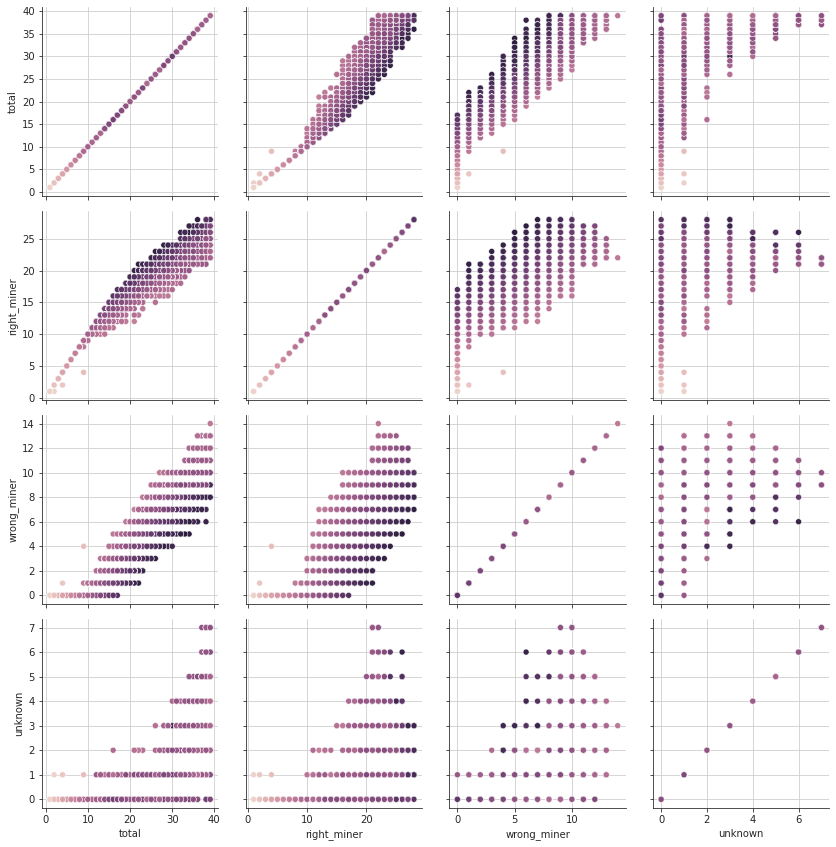

In [68]:
sns.set_style("ticks",{'axes.grid' : True})
g = sns.PairGrid(total40.drop(columns=['ids']), height=3, hue='f1score')
g.map(sns.scatterplot)

## 过滤出预测结果中 25~30正确。 0~3错误的。
甚至找不到。 比昨天的差

In [69]:
t = total40[filter(total40.right_miner, 25, 37)  & filter(total40.wrong_miner, 0, 3)]
t.sort_values('right_miner', ascending=False).shape

(0, 6)

In [70]:
from IPython.display import display
for i in df.index.names:
    display(t.groupby(i).count()[['total']].T)


max_depth
total


n_estimators
total


learning_rate
total


colsample_bytree
total


subsample
total


gt
total
